### Importing Libraries and Dataset

In [62]:
from kaggle.api.kaggle_api_extended import KaggleApi
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
# Downloading the Dataset

api = KaggleApi()
api.authenticate()

api.dataset_download_files(
    "ngshiheng/michelin-guide-restaurants-2021",
    path=".",   
    unzip=True 
)

Dataset URL: https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021


In [6]:
data = pd.read_csv('michelin_my_maps.csv')
data.head(3)

,Name,Address,Location,Price,Cuisine,Longitude,Latitude,PhoneNumber,Url,WebsiteUrl,Award,GreenStar,FacilitiesAndServices,Description
0,ES:SENZ,"Mietenkamer Straße 65, Grassau, 83224, Germany","Grassau, Germany",€€€€,"Creative, Modern Cuisine",12.465618,47.785630,4.986414e+11,https://guide.michelin.com/en/bayern/grassau/r...,https://www.das-achental.com/,3 Stars,0,"Air conditioning,Car park,Interesting wine list","Here in the restaurant of Das Achental hotel, ..."
1,Tohru in der Schreiberei,"Burgstraße 5, Munich, 80331, Germany","Munich, Germany",€€€€,"Modern Cuisine, Japanese Contemporary",11.577475,48.137597,4.989215e+11,https://guide.michelin.com/en/bayern/mnchen/re...,https://schreiberei-muc.de/,3 Stars,0,"Interesting wine list,Notable sake list",It is absolutely worth climbing the 23 steps o...
2,Schwarzwaldstube,"Tonbachstraße 237, Baiersbronn, 72270, Germany","Baiersbronn, Germany",€€€€,"Classic French, Creative",8.358280,48.536911,4.974425e+11,https://guide.michelin.com/en/baden-wurttember...,https://www.traube-tonbach.de/restaurants-bar/...,3 Stars,0,"Air conditioning,Car park,Great view,Interesti...","Schwarzwaldstube, the flagship restaurant of t..."


# Data Analysis

### Looks like there are some columns that will have no value for the analysis 
### Such as Url, WebsiteUrl,Address and PhoneNumber. Thus ,i will drop them

In [13]:
data = data.drop(['Url','WebsiteUrl','Address','PhoneNumber'],axis = 1)

In [16]:
data['Award'].value_counts()

Award
Selected Restaurants    11243
Bib Gourmand             3414
1 Star                   3097
2 Stars                   511
3 Stars                   157
Name: count, dtype: int64

In [65]:
data.isna().sum()
# The columns with NA are the categories of Selected Restaurants + Bib Gourmand and FacilitiesAndServices

Name                         0
Location                     0
Price                        0
Cuisine                      0
Longitude                    0
Latitude                     0
Award                        0
GreenStar                    0
FacilitiesAndServices      979
Description                  0
Stars                    14657
Countries                    0
dtype: int64

### Hence, this guide lists 11,243 restaurants with the following classifications:

- **Bib Gourmand (3,414):** Restaurants recognized for good quality and good value, but **without Michelin stars**.  
- **1 Star (3,097):** “A very good restaurant in its category.”  
- **2 Stars (511):** “Excellent cooking, worth a detour.”  
- **3 Stars (157):** “Exceptional cuisine, worth a special journey.”

### 

In [14]:
data['Location'].value_counts()

Location
Tokyo, Japan                       551
Paris, France                      466
London, United Kingdom             349
Singapore                          299
New York, USA                      265
                                  ... 
Saint-Laurent-sur-Saône, France      1
Cliousclat, France                   1
Parçay-Meslay, France                1
Villecresnes, France                 1
San Roque, Spain                     1
Name: count, Length: 5847, dtype: int64

#### WORLD VISION 

### Initially i want to analyse the world and answer the following 5 questions:

1. In which countries these restaurants are more concentrated?
2. How the stars are spread in these countries? 
3. Which country and cuisine has the lowest ratio Price/Star ? Thus, get to have this prestige with the lowest cost
4. Which country has the biggest diversity? ( ex : japan = mostly japanese , France = balanced etc)
5. Price distribution per country

1. Concentration of Countries with michelin

In [59]:
countries=data["Location"].str.split(',').str[-1].str.strip()
data['Countries'] = countries
# I transform ,in the column , each string in a list
# Then i take the last column of this string 
# And i remove extra spaces 

In [39]:
# Thus ,i can finally get a list of the countries that have the biggest restaurants in the catalog 
# and take the 3rd quartile in order to see how concentrated is the list

world_locations =countries.value_counts()
q3 = world_locations.quantile(0.75)

/var/folders/tz/tl_w5k6s62vcg00cl2mjjbtc0000gn/T/ipykernel_47606/3844998658.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_countries.values, y = top_countries.index , palette ='viridis')


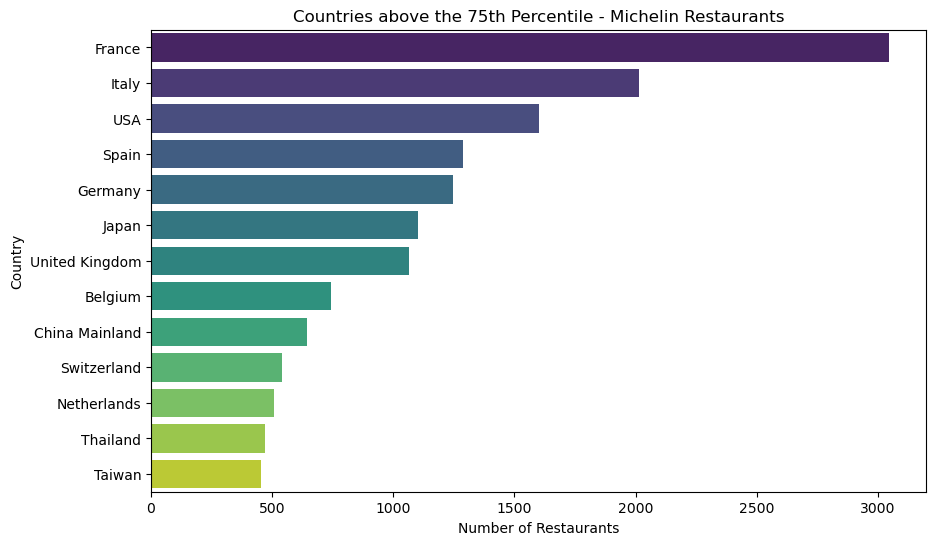

In [42]:
top_countries = world_locations[world_locations >=q3]

plt.figure(figsize=(10,6))
sns.barplot(x = top_countries.values, y = top_countries.index , palette ='viridis')
plt.title("Countries above the 75th Percentile - Michelin Restaurants")
plt.xlabel("Number of Restaurants")
plt.ylabel("Country")
plt.show()

### Thus, most restaurants are concentrated on the following countries: 

1. France
2. Italy
3. USA
4. Spain
5. Germany
6. Japan
7. UK

This shows how representative these countries are to the cuisine over the world and maybe the impact of it on all over restaurants. Does the kind of restaurant follows this trend? The majority of michelin restaurants , even from other countries, are also on this list? 

If yes, this could be an indicative of a parameter of success of obtaining a michelin star

2. How the stars are spread in these countries? 

### first i need to normalize the column into numbers

In [67]:
data['Stars'] = data['Award'].str.extract(r'(\d+)').astype(float)

# str.extract looks for numbers on the string and transform in NaN all the others
# astype(float) transform the result into float 


In [88]:
top7= top_countries.index[:7]

In [89]:
# First i want only the 7 countries that i analyzed before , thus i filter

stars_by_country = data[data['Countries'].isin(top7)]
#stars_by_country = best_countries.groupby(['Countries','Stars'])



In [96]:
stars_by_country['Countries'].unique()
# It is filtered

array(['Germany', 'France', 'Japan', 'United Kingdom', 'USA', 'Italy',
       'Spain'], dtype=object)

In [120]:
# unstack to transform stars into columns and sort descending with a temporary column
graph_stars = stars_by_country.groupby(["Countries","Stars"]).size().unstack(fill_value=0)

graph_stars['Total'] = graph_stars.sum(axis=1)
graph_stars = graph_stars.sort_values(by='Total', ascending = False)
graph_stars = graph_stars.drop(columns = 'Total')


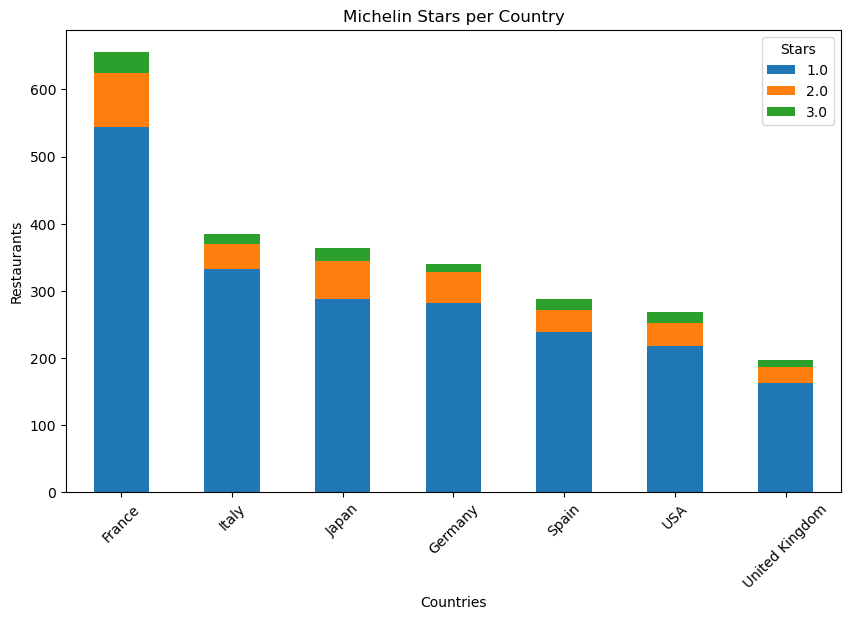

In [121]:
# Plot a stacked graph in order to analyse better

graph_stars.plot(kind='bar',stacked = True, figsize=(10,6))

plt.title("Michelin Stars per Country")
plt.xlabel("Countries")
plt.ylabel("Restaurants")
plt.legend(title="Stars")
plt.xticks(rotation = 45)
plt.show()